<a href="https://colab.research.google.com/github/anamika1302/ML_algo_from_scratch/blob/main/PCAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA steps

  1. make datasets mean centered
  2. calculate covariance matrix, np.cov(X.T)
  3. calclate eigen values and eigen vectors , np.linalg, use eigen_vectors.T
  4. sort eigenvalues in descencding order
  5. Get top k components using slicing
  6. Project onto new directory , use components.T

In [82]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as  plt

In [77]:
class PCA:

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self,X):

    # mean
    self.mean = np.mean(X, axis =0)
    X = X - self.mean
    # calculate covariance
    # X is np.ndarray where row = 1 sample and columns = features
    cov_mat = np.cov(X.T)
    #calculate eigen vector and eigen values-
    # eigen vectors are return as column values
    eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
    #sort eigen vector
    eigen_vectors = eigen_vectors.T
    idxs = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idxs]
    eigen_vectors = eigen_vectors[idxs]
    #First K eigen vectors
    # store first n eigenvectors
    self.components = eigen_vectors[0 : self.n_components]



  def transform(self,X):
    #projecting data to new dimensions
    X = X- self.mean
    return np.dot(X, self.components.T)






### Testing

In [78]:
data = load_iris()
X = data.data
Y = data.target

In [79]:
pca =PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [84]:
print("Shape of X: ", X.shape)
print("Shape of X_projected: ", X_projected.shape)

Shape of X:  (150, 4)
Shape of X_projected:  (150, 2)


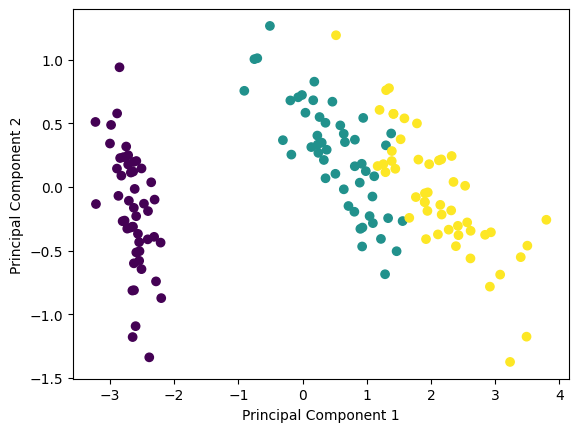

In [89]:
plt.scatter(X_projected[:,0], X_projected[:,1], c =Y)


# x1 = X_projected[:, 0]
# x2 = X_projected[:, 1]

# plt.scatter(
#     x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
# )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.colorbar()
plt.show()